- This notebook covers various data cleaning techniques implemented using Pandas.
- The data used is a very small(only 40 rows),unclean, and fake transaction data stored in a .csv file.
- The problems tackled include poor data formatting and standardization, and inferring missing values.

1. **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# show all columns in the output
pd.set_option('display.max_columns', 50)

# set flots to be displayed in 2d.p for readability
pd.options.display.float_format = '{:20.2f}'.format


📌Note 


The `20` specifies the width of the output, and `.2f` ensures the number is formatted to 2 decimal places. If the number has fewer characters than 20, it will be padded with spaces on the left. If the number is longer, it will not be truncated but simply take more space.

2. **Understanding the data**


In [2]:
# create dataframe
df = pd.read_csv('./Data/data_to_be_cleaned.csv')
df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold


In [3]:
# shape of data
df.shape

(40, 6)

In [4]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        40 non-null     int64  
 1   Client               38 non-null     object 
 2   Beneficiary          40 non-null     object 
 3   AmountUSD            38 non-null     float64
 4   TransactionDateTime  40 non-null     object 
 5   ClientTier           37 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [5]:
# summary statistics
df.describe(include='all')

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
count,40.00,38,40,38.00,40,37
unique,NaN,31,37,NaN,37,4
top,NaN,Tony Stark,Luke Skywalker,NaN,2024-06-01 12:32,Gold
freq,NaN,4,2,NaN,2,15
mean,20.50,NaN,NaN,153.90,NaN,NaN
std,11.69,NaN,NaN,75.01,NaN,NaN
min,1.00,NaN,NaN,60.00,NaN,NaN
25%,10.75,NaN,NaN,91.25,NaN,NaN
50%,20.50,NaN,NaN,132.50,NaN,NaN
75%,30.25,NaN,NaN,200.00,NaN,NaN


3. **Clean the data**

In [6]:
# copy df to work with copy
clean_df = df.copy()

In [7]:
# drop rows with null Client column values
clean_df.dropna(subset=['Client'], inplace=True)
clean_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold


In [8]:
# drop duplicates
columns = clean_df.columns

clean_df.drop_duplicates(subset=[col for col in columns if col != 'TransactionID'] ,inplace=True)

In [9]:
clean_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold
10,11,Tony Stark,Peter Parker,320.50,2024-06-01 12:39,Gold


In [10]:
# cleaning string data
#Since this is a very small dataset, we can obtain the special characters present in the client column for removal
clean_df['Client'].str.replace('[a-zA-Z0-9 ]', '', regex=True).unique()

array(['', '<>', '.', '*', '--'], dtype=object)

In [11]:
# strip removes characters at the start and end of the string
clean_df['Client'] = clean_df['Client'].str.strip('<>.*- ')

# remove the * present in the middle of the name
clean_df['Client'] = clean_df['Client'].str.replace('*', ' ')

clean_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,Frodo Baggins,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold
10,11,Tony Stark,Peter Parker,320.50,2024-06-01 12:39,Gold


In [12]:
# data standardization
# make all the names uppercase
clean_df['Client'] = clean_df['Client'].str.upper()
clean_df['Beneficiary'] = clean_df['Beneficiary'].str.upper()
clean_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,NaN,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRY POTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold


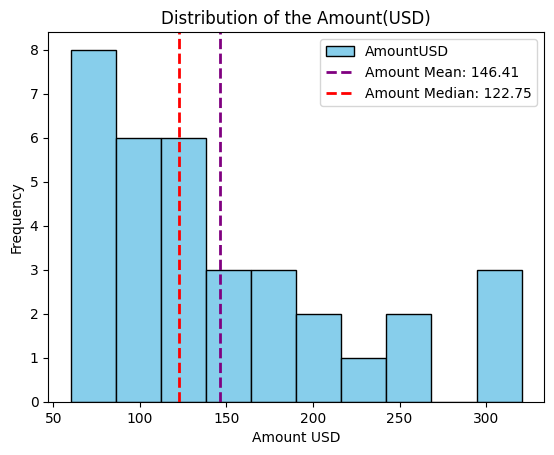

In [13]:
# histplot of the AmountUSD distribution

# mean
amount_mean = clean_df['AmountUSD'].mean()
# median
amount_median =  clean_df['AmountUSD'].median()



ax = clean_df['AmountUSD'].plot(kind='hist', bins=10, edgecolor='black', color='skyblue')

# plot vertical lines for mean and median
ax.axvline(amount_mean, color='purple', linestyle='dashed', linewidth=2, label=f'Amount Mean: {amount_mean:.2f}')
ax.axvline(amount_median, color='red', linestyle='dashed', linewidth=2, label=f'Amount Median: {amount_median:.2f}')

ax.set_xlabel('Amount USD')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of the Amount(USD)')

ax.legend()


The median value is closer to majority of the data than the mean value

In [14]:
# average of the deviation due to mean and median
avg_mean_dev = np.mean(np.abs(clean_df['AmountUSD'] - amount_mean))
avg_median_dev = np.mean(np.abs(clean_df['AmountUSD'] - amount_median))

print(f'Mean deviation: {avg_mean_dev:.4f}')
print(f'Median deviation: {avg_median_dev:.4f}')

Mean deviation: 59.0638
Median deviation: 55.7912


It can be observed that replacing null values with the mean instead of median will introduce more error in the data.

In [15]:
# replace null amounts with median
clean_df.fillna({'AmountUSD': amount_median}, inplace=True)
clean_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,122.75,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRY POTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold


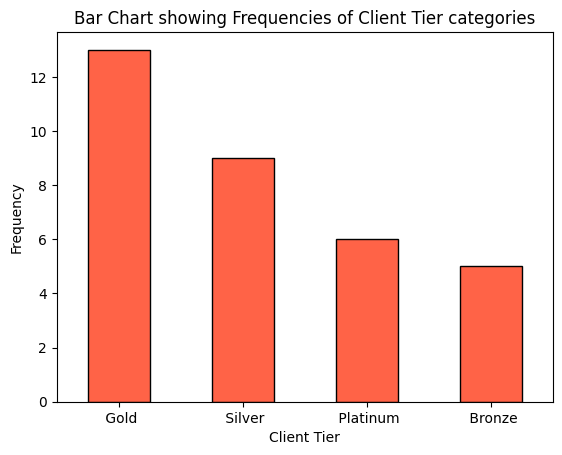

In [16]:
# plot the bar chart showing the frequency of the Client Tier categories
categories = clean_df['ClientTier'].value_counts()

categories.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Bar Chart showing Frequencies of Client Tier categories')
plt.xlabel('Client Tier')
plt.ylabel('Frequency')
plt.xticks(rotation=0);

In [17]:
# check for any special characters (non-alphabetical)
clean_df['ClientTier'].str.replace('[a-zA-Z]', '', regex=True).unique()

array([' ', nan], dtype=object)

In [18]:
# remove the space in the category names
clean_df['ClientTier'] = clean_df['ClientTier'].str.strip()

In [19]:
# mode of the categorical data
client_tier_mode = clean_df['ClientTier'].mode()[0]
client_tier_mode

'Gold'

In [20]:
# replace null values with mode
clean_df.fillna({'ClientTier': client_tier_mode}, inplace=True)
clean_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,122.75,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRY POTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold


The data is now clean and can be used in the next stage of its cyle.